In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/marvel-comic-books")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andre\.cache\kagglehub\datasets\deepcontractor\marvel-comic-books\versions\4


In [1]:
import pandas as pd

In [9]:
marvel_comics = pd.read_csv(path + "/Marvel_Comics.csv")

In [10]:
marvel_comics

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

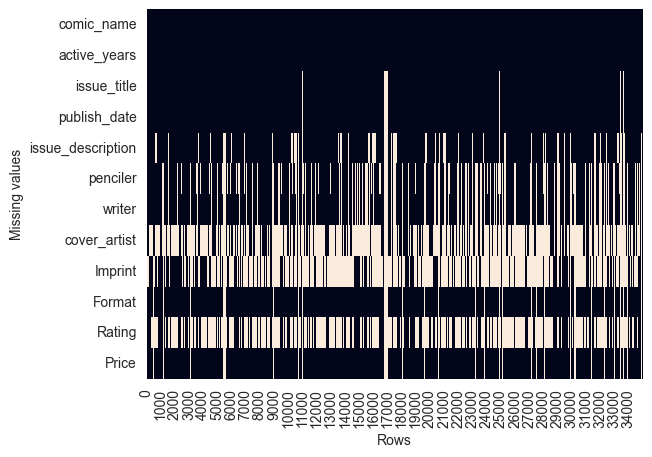

In [11]:
ax = plt.axes()
sns.heatmap(marvel_comics.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Rows")
plt.ylabel("Missing values")

plt.show()

In [12]:
import numpy as np

In [13]:
marvel_comics["missing_description"] = np.where(marvel_comics["issue_description"].isna(), 1, 0)
marvel_comics["comic_age"] = 2025 - pd.to_datetime(marvel_comics["publish_date"], errors="coerce").dt.year

In [14]:
print(marvel_comics["Price"].unique()[:10])

[' Free' ' $4.99' ' $3.99' ' $2.99' ' $7.99' ' $1.99' ' $2.50' nan
 ' $1.00' ' $5.99']


In [15]:
marvel_comics["price_clean"] = (
    marvel_comics["Price"]
    .replace(" Free", "$0.00")
    .str.replace("$", "", regex=False)
)

marvel_comics["price_clean"] = pd.to_numeric(marvel_comics["price_clean"], errors="coerce")

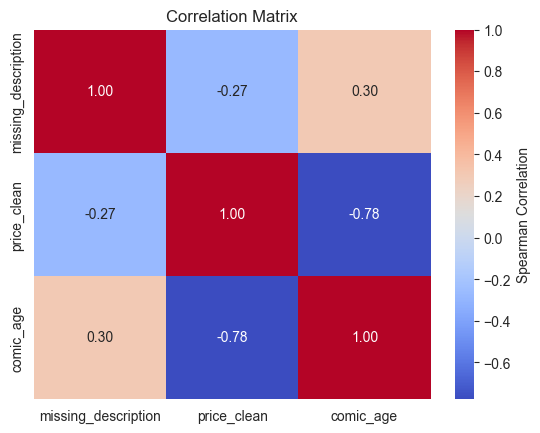

In [16]:
cols_of_interest = ["missing_description", "price_clean", "comic_age"]

correlation_matrix = marvel_comics[cols_of_interest].corr(method="spearman")

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            cbar_kws={"label": "Spearman Correlation"})
plt.title("Correlation Matrix")
plt.show()

In [17]:
marvel_comics[(marvel_comics["issue_description"].isna()) |
              (marvel_comics["Price"].isna()) |
              (marvel_comics["publish_date"].isna())
]

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price,missing_description,comic_age,price_clean
59,A-Next (1998 - 1999),(1998 - 1999),A-Next (1998) #1,"October 01, 1998",NaN,Ron Frenz,"Tom Defalco, Ron Frenz",Ron Frenz,Marvel Universe,Comic,A,$1.99,1,27.0,1.99
91,Adventure Into Fear (1970 - 1975),(1970 - 1975),MAN-THING: WHATEVER KNOWS FEAR TPB (Trade Pape...,"July 01, 2005",Collects Man-Thing (2004) #1-3; Savage Tales (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20.0,NaN
186,Age of Apocalypse: The Chosen (1995),(1995),X-Men: The Complete Age of Apocalypse Epic Boo...,"October 05, 2005",See your favorite mutants through a dark glass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20.0,NaN
193,Age of Conan: Valeria (2019 - Present),(2019 - Present),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
266,Agents of Atlas (2006 - 2007),(2006 - 2007),AGENTS OF ATLAS PREMIERE HC (Hardcover),"April 25, 2007",The spy. The spaceman. The goddess. The robot....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,Young Men (1950 - 1953),(1950 - 1953),Young Men (1950) #7,"November 30, -0001",NaN,NaN,NaN,NaN,NaN,Comic,NaN,Free,1,NaN,0.00
34971,Young Men (1950 - 1953),(1950 - 1953),Young Men (1950) #9,"November 30, -0001",NaN,NaN,NaN,NaN,NaN,Comic,NaN,Free,1,NaN,0.00
34972,Young Men (1950 - 1953),(1950 - 1953),Young Men (1950) #10,"November 30, -0001",NaN,NaN,NaN,NaN,NaN,Comic,NaN,Free,1,NaN,0.00
34973,Young Men (1950 - 1953),(1950 - 1953),Young Men (1950) #11,"November 30, -0001",NaN,NaN,NaN,NaN,NaN,Comic,NaN,Free,1,NaN,0.00


In [18]:
marvel_comics_complete = marvel_comics[~(marvel_comics["issue_description"].isna()) &
                                       ~(marvel_comics["Price"].isna()) &
                                       ~(marvel_comics["publish_date"].isna())
]

In [19]:
marvel_comics_complete

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price,missing_description,comic_age,price_clean
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99,0,6.0,3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99


In [20]:
marvel_comics_complete["Format"].value_counts().reset_index().sort_values(by="count", ascending=False)

,Format,count
0,Comic,28389
1,Digital Comic,298
2,Infinite Comic,273
3,Trade Paperback,204
4,Hardcover,70
5,Magazine,52
6,Digest,9
7,MAGAZINE,6
8,DIGITAL COMIC,6
9,comic,3


In [24]:
marvel_comics_complete.loc[:, "words_in_description"] = marvel_comics_complete["issue_description"].str.split().str.len()

In [25]:
marvel_comics_complete

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price,missing_description,comic_age,price_clean,words_in_description
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00,23
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,40
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00,54
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,47
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99,0,6.0,3.99,31
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,95
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,138
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,80


In [26]:
marvel_comics_complete.loc[marvel_comics_complete["words_in_description"].between(1, 10), "issue_description"]

49            The Avengers defeat their evil counterparts.
51       Thunderstrike and Blacklight vs. the Soldiers ...
60                       VENOM AND CARNAGE - TO THE DEATH!
97        The final undoing of the Caretakers of Arcturus!
122       A vacationing family finds a monster in a swamp!
                               ...                        
34439    Will the X-Men survive their first confrontati...
34443    Can Xavier reach his prospective students befo...
34580                                Collecting X-MEN #7-9
34830    Sage and Bishop are breaking in...to the X-Man...
34966    The Human Torch returns to crime-fighting afte...
Name: issue_description, Length: 1292, dtype: object

In [37]:
marvel_comics_complete.loc[marvel_comics_complete["words_in_description"].between(11, 20), "issue_description"]

19       BEAST AND WONDER MAN TOGETHER AGAIN! CAPTAIN A...
20       THOR AND MAGIK FIGHT DEMONS IN LIMBO! CYLCOPS ...
23       Captain America and Wolverine fight a villain ...
27       Storm and Black Panther's first post-AVX encou...
29       Spider-Man and Beast fight zombies, while Iron...
                               ...                        
34965    Groups of "young" hoodlums are creating quite ...
34975    The final issue! See the conclusion to the END...
34977    A mysterious "secret" X-Man joins the team, as...
34982    It's Marvel's youngest mutants' biggest test t...
34983    It's the Young X-Men vs. the Hellfire Club! Wi...
Name: issue_description, Length: 4542, dtype: object

In [38]:
marvel_comics_complete.loc[marvel_comics_complete["words_in_description"].between(21, 30), "issue_description"]

0        The Infinite Comic that will have everyone tal...
14       SPIDER-MAN + PSYLOCKE= a heart-breaking story ...
21       BLACK WIDOW and FANTOMEX find themselves on op...
25       Kieron Gillen's worlds collide as Loki and Mr....
26       Zeb Wells and Dale Keown spin a story bringing...
                               ...                        
34964    The hour of nuclear war may be at hand -- the ...
34976    Dust is dying. Ever since she was turned to gl...
34978    The Young X-Men face the next generation of su...
34980    The Young X-Men have a brand new line-up... bu...
34981    One Young X-Man is dead! But there are still m...
Name: issue_description, Length: 5610, dtype: object

In [39]:
marvel_comics_complete_21_words = marvel_comics_complete[marvel_comics_complete["words_in_description"] >=21]
marvel_comics_complete_21_words

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price,missing_description,comic_age,price_clean,words_in_description
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00,23
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,40
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00,54
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,47
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99,0,6.0,3.99,31
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,95
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,138
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,80


In [42]:
marvel_comics_complete_21_words.loc[:, "id"] = marvel_comics_complete_21_words.index

marvel_comics_complete_21_words.loc[:, "tagged_description"] = (
    marvel_comics_complete_21_words[["id", "issue_description"]]
    .astype(str)
    .agg(" ".join, axis=1)
)

In [43]:
marvel_comics_complete_21_words

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price,missing_description,comic_age,price_clean,words_in_description,id,tagged_description
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00,23,0,0 The Infinite Comic that will have everyone t...
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,40,1,"1 It’s August, and Nick Fury is just in time t..."
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free,0,9.0,0.00,54,2,2 Join us in a brand new Marvel comics adventu...
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,47,3,3 Celebrating the Fourth of July is complicate...
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free,0,9.0,0.00,62,4,4 Sam Alexander’s finding it hard to cope with...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99,0,6.0,3.99,31,34987,34987 NOT SO FUNNY WHEN IT HAPPENS TO YOU? Onc...
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,95,34988,34988 With a thousand zombies in front of him ...
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,138,34989,34989 The hordes of zombies gathered outside t...
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99,0,19.0,3.99,80,34990,"34990 For Simon Garth, it's come down to two v..."


In [44]:
(
    marvel_comics_complete_21_words
    .drop(["missing_description", "comic_age","price_clean", "words_in_description"], axis=1)
    .to_csv("marvel_comics_cleaned", index=False)
)